In [1]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/q7vaafzze6azazdjslntbnufais4sr')
#convert 'CrimeDate' to datetime type
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
print(df.head())

   CrimeDate CrimeTime CrimeCode            Location           Description  \
0 2016-11-12  02:35:00        3B   300 SAINT PAUL PL      ROBBERY - STREET   
1 2016-11-12  02:56:00       3CF      800 S BROADWAY  ROBBERY - COMMERCIAL   
2 2016-11-12  03:00:00        6D    1500 PENTWOOD RD     LARCENY FROM AUTO   
3 2016-11-12  03:00:00        6D      6600 MILTON LN     LARCENY FROM AUTO   
4 2016-11-12  03:00:00        6E  300 W BALTIMORE ST               LARCENY   

  Inside/Outside   Weapon   Post      District                Neighborhood  \
0              O      NaN  111.0       CENTRAL                    Downtown   
1              I  FIREARM  213.0  SOUTHEASTERN                 Fells Point   
2              O      NaN  413.0  NORTHEASTERN  Stonewood-Pentwood-Winston   
3              O      NaN  424.0  NORTHEASTERN                   Westfield   
4              O      NaN  111.0       CENTRAL                    Downtown   

                        Location 1  Total Incidents  
0  (39.2

In [2]:
#copy a piece of html contain table of Baltimore population as the "string" at:
#http://worldpopulationreview.com/us-counties/md/baltimore-city-population/
string='<tbody><tr><td>1860</td><td>212,418</td><td></td><td><span style="color:red">0.00%</span></td></tr><tr><td>1870</td><td>267,354</td><td>54,936</td><td><span style="color:green">25.86%</span></td></tr><tr><td>1880</td><td>332,313</td><td>64,959</td><td><span style="color: green;">24.30%</span></td></tr><tr><td>1890</td><td>434,439</td><td>102,126</td><td><span style="color: green;">30.73%</span></td></tr><tr><td>1900</td><td>508,957</td><td>74,518</td><td><span style="color:green">17.15%</span></td></tr><tr><td>1910</td><td>558,485</td><td>49,528</td><td><span style="color: green;">9.73%</span></td></tr><tr><td>1920</td><td>733,826</td><td>175,341</td><td><span style="color:green">31.40%</span></td></tr><tr><td>1930</td><td>804,874</td><td>71,048</td><td><span style="color: green;">9.68%</span></td></tr><tr><td>1940</td><td>859,100</td><td>54,226</td><td><span style="color: green;">6.74%</span></td></tr><tr><td>1950</td><td>949,708</td><td>90,608</td><td><span style="color: green;">10.55%</span></td></tr><tr><td>1960</td><td>939,024</td><td>-10,684</td><td><span style="color:red">-1.12%</span></td></tr><tr><td>1970</td><td>905,759</td><td>-33,265</td><td><span style="color:red">-3.54%</span></td></tr><tr><td>1980</td><td>786,775</td><td>-118,984</td><td><span style="color:red">-13.14%</span></td></tr><tr><td>1990</td><td>736,014</td><td>-50,761</td><td><span style="color: red;">-6.45%</span></td></tr><tr><td>2010</td><td>621,026</td><td>-114,988</td><td><span style="color: red;">-15.62%</span></td></tr><tr><td>2011</td><td>620,839</td><td>-187</td><td><span style="color: red;">-0.03%</span></td></tr><tr><td>2012</td><td>623,387</td><td>2,548</td><td><span style="color:green">0.41%</span></td></tr><tr><td>2013</td><td>623,280</td><td>-107</td><td><span style="color: red;">-0.02%</span></td></tr><tr><td>2014</td><td>624,062</td><td>782</td><td><span style="color:green">0.13%</span></td></tr><tr><td>2015</td><td>623,031</td><td>-1,031</td><td><span style="color: red;">-0.17%</span></td></tr><tr></tr><tr><td>2016</td><td>616,958</td><td>-6,073</td><td><span style="color: red;">-0.97%</span></td></tr><tr><td>2017</td><td>611,648</td><td>-9,352</td><td><span style="color:red">-1.51%</span></td></tr></tbody>'

In [106]:
#parsing the string to obtain data
import re
import numpy as np
#re.split('<td>|</td>', string)
list1=re.split('<tr><td>|</td><td>', string)
for i in list1:
    if re.search('<',i) or i==[]:
       list1.remove(i) 
df_pop=pd.DataFrame(columns=['Year','Population',])
#years of interest 2011 - 2017
years=np.arange(2011,2017,1)
for i in years:
    i=(str(i)) 
    if i in list1:
        ID=list1.index(i)
        df_pop=df_pop.append({'Year': i,'Population': int(list1[ID+1].replace(',', ''))}, ignore_index=True)
df_pop=df_pop.set_index('Year')
#print('list1, (extract fromhttp://worldpopulationreview.com/us-counties/md/baltimore-city-population/): \n', list1,'\n')
print('Years in concern:\n', years,'\n')
print('Data on Baltimore population:\n',df_pop,'\n')

Years in concern:
 [2011 2012 2013 2014 2015 2016] 

Data on Baltimore population:
      Population
Year           
2011     620839
2012     623387
2013     623280
2014     624062
2015     623031
2016     616958 



In [ ]:
 from datetime import datetime
# date_string = '2009-11-29 03:17 PM'
# format = '%Y-%m-%d %I:%M %p'
date_string = '2009-11-29'
format = '%Y-%m-%d'
my_date = datetime.strptime(date_string, format)
print(my_date.strftime('%m'))


df['Month'] = df['CrimeDate'].map(lambda x: x.month)
df['Year'] = df['CrimeDate'].map(lambda x: x.year)#str(x.year)+'-'+str(x.month))
print(df.head())
#df['month']=df['CrimeDate'].


In [108]:
df_print=pd.DataFrame()
grouped = df.groupby('Year')
for i in grouped:
    df_year=i[1].groupby(['Month'])['CrimeDate'].count()
#     pop=df_pop.loc['2012','Population']
#     df_year=df_year/pop
    df_print[str(i[0])] = df_year/df_pop.loc[str(i[0]),'Population']*1000
#    Variables = series.keys()
df_print.loc[11,'2016']=np.nan
print(df_print)
#print(grouped.get_group(2014).head())

           2011      2012      2013      2014      2015      2016
Month                                                            
1      5.540889  6.156689  6.111218  5.853585  5.815120  5.484976
2      5.006129  5.386702  5.134129  4.632553  4.253400  4.656719
3      6.876179  6.901010  5.832050  5.515478  5.401015  5.864257
4      6.682892  6.382873  6.396804  6.018633  6.272561  6.235433
5      7.274028  7.456043  7.138044  6.675619  7.116821  6.848116
6      7.130673  6.891385  7.083494  6.435258  7.473143  7.141491
7      7.520468  7.077466  7.182968  6.723691  7.665750  6.624438
8      7.367450  7.241088  7.414003  6.611523  7.469933  6.848116
9      7.050137  6.748617  6.773842  6.523390  7.075089  7.180392
10     7.480200  6.775887  7.389937  6.747727  6.765313  7.569397
11     7.104902  6.260958  6.356694  5.988187  6.537395       NaN
12     6.550813  6.224063  6.672763  5.917681  6.490849       NaN


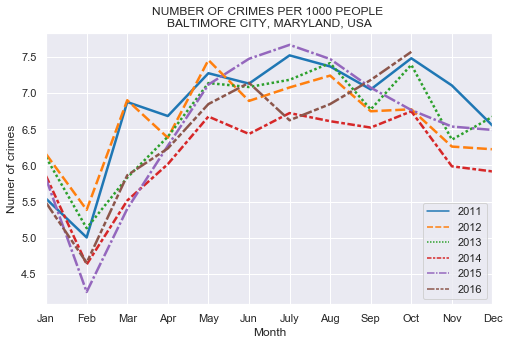

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
sns.set(rc={'figure.figsize':(8,5)})
sns.set(style="darkgrid")
g=sns.lineplot(data=df_print, palette="tab10", linewidth=2.5)
g.xaxis.set_major_locator(ticker.MultipleLocator(1))
g.set(xticklabels=["","Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])
g.set(xlim=[1,12])
g.set(title='NUMBER OF CRIMES PER 1000 CITIZENS \nBALTIMORE CITY, MARYLAND, USA')
g.set(ylabel='Numer of crimes')
print('')